In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navjotkaushal/mobile-price-classification-dataset") + '/Mobile.csv'

print("Path to dataset files:", path)


/home/vavilon/.anaconda3/envs/test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/vavilon/.cache/kagglehub/datasets/navjotkaushal/mobile-price-classification-dataset/versions/1/Mobile.csv


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(path)
df.head()

,Battery_power_mAh,Bluetooh,Speed_of_microprocessor,Dual_sim,Front_camera,4G,Internal_memeory_gb,Mobile_depth,Mobile_weight,Cores_of_processor,...,px_height,Pixel_width,Ram_mb,Screen_height,Screen_weight,talk_time,3G,touch_screen,wifi,price_range
0,842 mAh,No,2.2,No,1 pixels,No,7 gb,0.6 cm,188 g,2,...,20 ppcm,756 ppcm,2549 mb,9 cm,7 cm,19,No,No,Yes,Medium cost
1,1021 mAh,Yes,0.5,Yes,0 pixels,Yes,53 gb,0.7 cm,136 g,3,...,905 ppcm,1988 ppcm,2631 mb,17 cm,3 cm,7,Yes,Yes,No,High cost
2,563 mAh,Yes,0.5,Yes,2 pixels,Yes,41 gb,0.9 cm,145 g,5,...,1263 ppcm,1716 ppcm,2603 mb,11 cm,2 cm,9,Yes,Yes,No,High cost
3,615 mAh,Yes,2.5,No,0 pixels,No,10 gb,0.8 cm,131 g,6,...,1216 ppcm,1786 ppcm,2769 mb,16 cm,8 cm,11,Yes,No,No,High cost
4,1821 mAh,Yes,1.2,No,13 pixels,Yes,44 gb,0.6 cm,141 g,2,...,1208 ppcm,1212 ppcm,1411 mb,8 cm,2 cm,15,Yes,Yes,No,Medium cost


In [3]:
keep_only_digits = [
    'Battery_power_mAh',
    'Front_camera',
    'Internal_memeory_gb',
    'Mobile_depth',
    'Mobile_weight',
    'Primary_camera',
    'px_height',
    'Pixel_width',
    'Ram_mb',
    'Screen_height',
    'Screen_weight',
    ]

In [4]:
df.shape

(2000, 21)

In [5]:
keep_only_digits: list[str]
keep_digit = lambda col: col.str.split(' ').str[0]
df[keep_only_digits] = df[keep_only_digits].astype(str).apply(keep_digit).astype(float)
df.head(3)

,Battery_power_mAh,Bluetooh,Speed_of_microprocessor,Dual_sim,Front_camera,4G,Internal_memeory_gb,Mobile_depth,Mobile_weight,Cores_of_processor,...,px_height,Pixel_width,Ram_mb,Screen_height,Screen_weight,talk_time,3G,touch_screen,wifi,price_range
0,842.0,No,2.2,No,1.0,No,7.0,0.6,188.0,2,...,20.0,756.0,2549.0,9.0,7.0,19,No,No,Yes,Medium cost
1,1021.0,Yes,0.5,Yes,0.0,Yes,53.0,0.7,136.0,3,...,905.0,1988.0,2631.0,17.0,3.0,7,Yes,Yes,No,High cost
2,563.0,Yes,0.5,Yes,2.0,Yes,41.0,0.9,145.0,5,...,1263.0,1716.0,2603.0,11.0,2.0,9,Yes,Yes,No,High cost


Text(0.5, 0, 'Column')

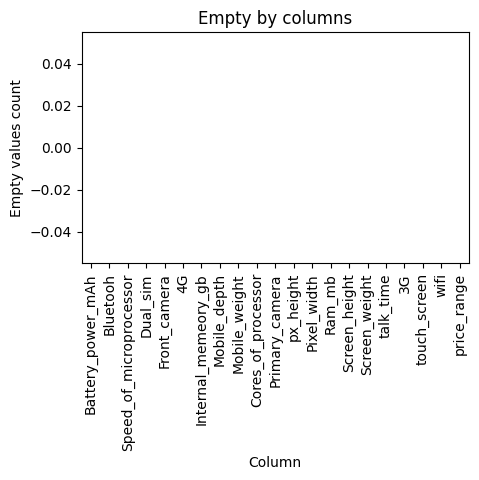

In [6]:
ax = df.isnull().sum().plot.bar(figsize=(5, 3))
ax.set_title('Empty by columns')
ax.set_ylabel('Empty values count')
ax.set_xlabel('Column')

Text(0.5, 0, 'Target')

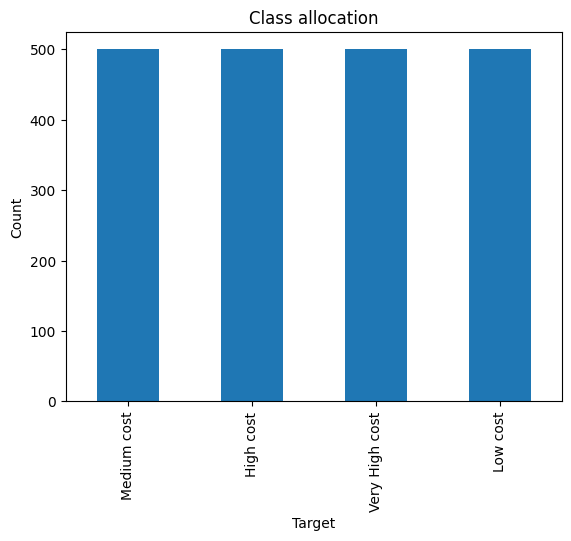

In [7]:
ax = df.price_range.value_counts().plot.bar()
ax.set_title('Class allocation')
ax.set_ylabel('Count')
ax.set_xlabel('Target')

array([[<Axes: title={'center': 'Battery_power_mAh'}>,
        <Axes: title={'center': 'Speed_of_microprocessor'}>,
        <Axes: title={'center': 'Front_camera'}>,
        <Axes: title={'center': 'Internal_memeory_gb'}>,
        <Axes: title={'center': 'Mobile_depth'}>,
        <Axes: title={'center': 'Mobile_weight'}>,
        <Axes: title={'center': 'Cores_of_processor'}>],
       [<Axes: title={'center': 'Primary_camera'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'Pixel_width'}>,
        <Axes: title={'center': 'Ram_mb'}>,
        <Axes: title={'center': 'Screen_height'}>,
        <Axes: title={'center': 'Screen_weight'}>,
        <Axes: title={'center': 'talk_time'}>]], dtype=object)

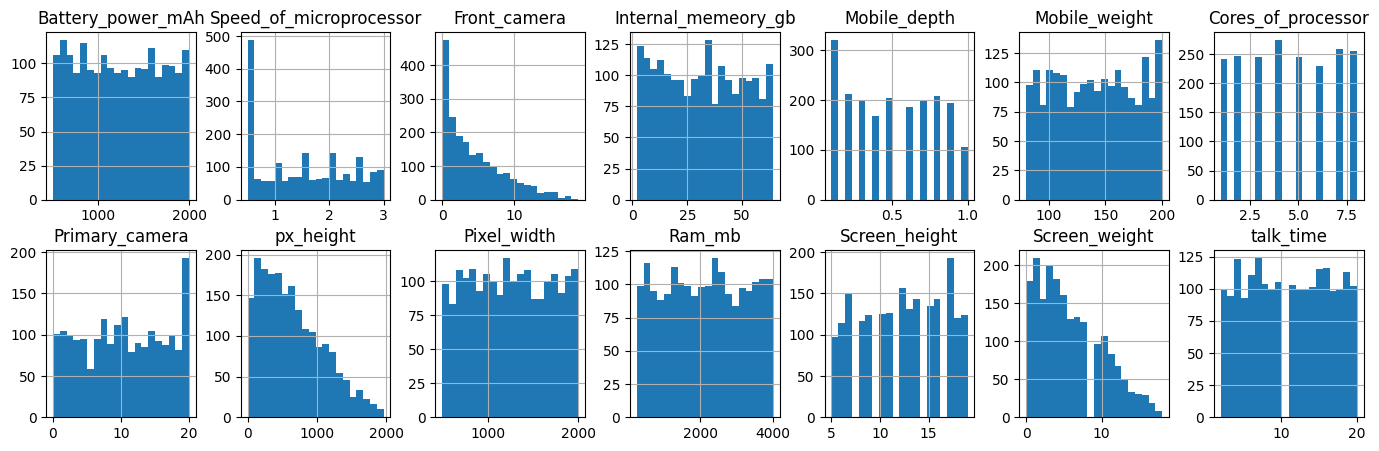

In [8]:
df.hist(layout=(2, 7), figsize=(17, 5), bins=20)

Battery_power_mAh             Axes(0.125,0.53;0.0945122x0.35)
Speed_of_microprocessor    Axes(0.238415,0.53;0.0945122x0.35)
Front_camera               Axes(0.351829,0.53;0.0945122x0.35)
Internal_memeory_gb        Axes(0.465244,0.53;0.0945122x0.35)
Mobile_depth               Axes(0.578659,0.53;0.0945122x0.35)
Mobile_weight              Axes(0.692073,0.53;0.0945122x0.35)
Cores_of_processor         Axes(0.805488,0.53;0.0945122x0.35)
Primary_camera                Axes(0.125,0.11;0.0945122x0.35)
px_height                  Axes(0.238415,0.11;0.0945122x0.35)
Pixel_width                Axes(0.351829,0.11;0.0945122x0.35)
Ram_mb                     Axes(0.465244,0.11;0.0945122x0.35)
Screen_height              Axes(0.578659,0.11;0.0945122x0.35)
Screen_weight              Axes(0.692073,0.11;0.0945122x0.35)
talk_time                  Axes(0.805488,0.11;0.0945122x0.35)
dtype: object

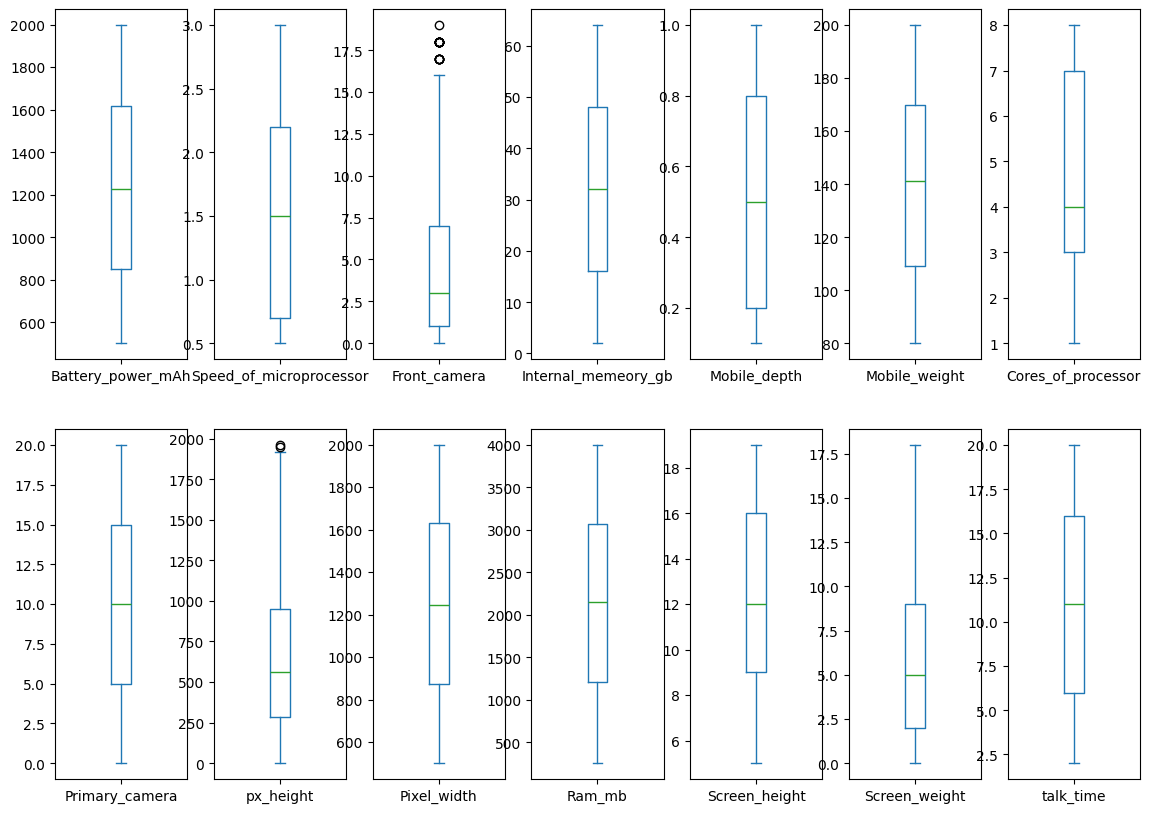

In [9]:
df.plot.box(subplots=True, layout=(2, 7), figsize=(14, 10))

<Axes: >

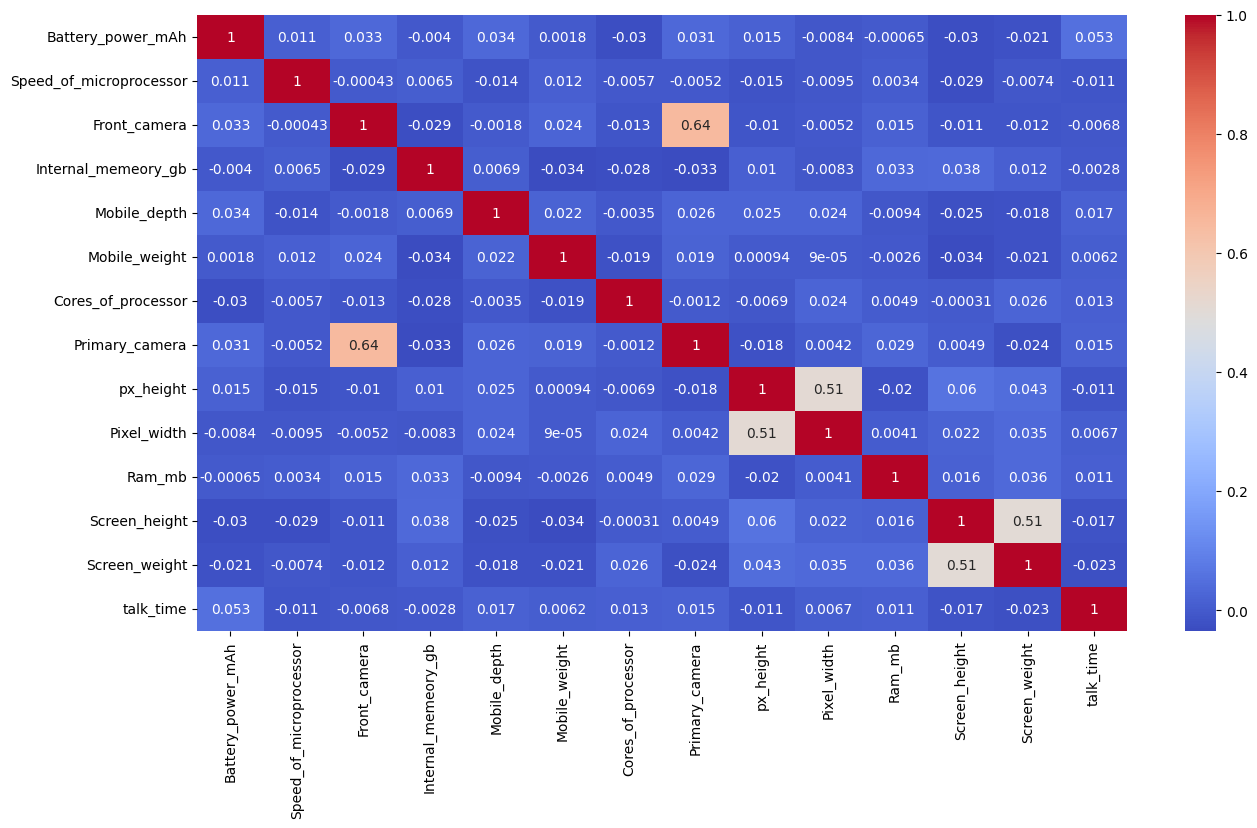

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [11]:
from sklearn.preprocessing import LabelEncoder
cp = df.copy()
categorial_features = cp.select_dtypes(include='object').columns.difference(['price_range', 'target']).tolist()
# just a plug for visualization 
cp[categorial_features] = cp[categorial_features].apply(lambda x: LabelEncoder().fit_transform(x), axis=0)

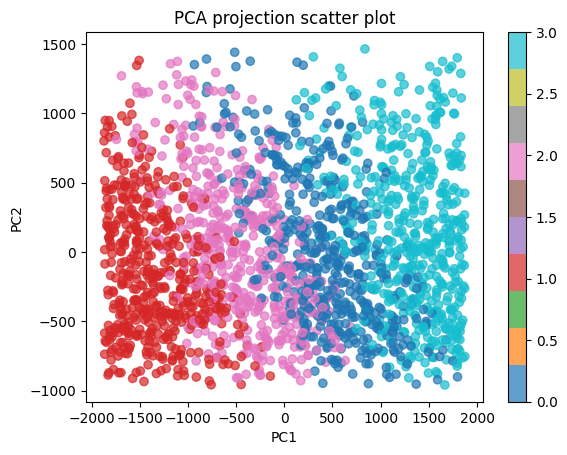

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(cp[numeric_cols])
plt.scatter(
    proj[:,0], proj[:,1],
    c=LabelEncoder().fit_transform(df['price_range']),
    cmap='tab10', alpha=0.7
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection scatter plot')
plt.colorbar()
plt.show()

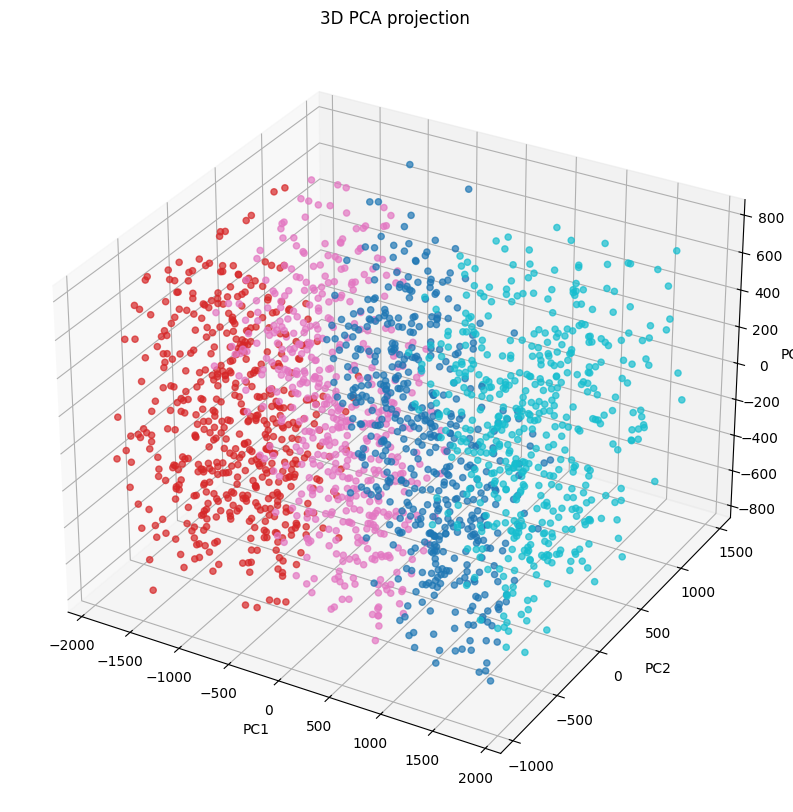

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
proj = pca.fit_transform(cp[numeric_cols])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    proj[:,0], proj[:,1], proj[:,2],
    c=LabelEncoder().fit_transform(df['price_range']),
    cmap='tab10', alpha=0.7
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA projection')
plt.show()

In [181]:
from sklearn.model_selection import train_test_split

X = df.drop(['price_range'], axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2, stratify=y_train)

In [182]:
from catboost import CatBoostClassifier, Pool
catboost = CatBoostClassifier(
    iterations=2000,
    early_stopping_rounds=1000,
    learning_rate=0.001,
    task_type='GPU',
    verbose=100,
    random_state=42,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    auto_class_weights='Balanced',
)

In [183]:
train_pool = Pool(X_train, y_train, cat_features=categorial_features)
val_pool = Pool(X_val, y_val, cat_features=categorial_features)

In [184]:
catboost.fit(train_pool, eval_set=val_pool)

0:	learn: 0.8186279	test: 0.8575186	best: 0.8575186 (0)	total: 8.69ms	remaining: 17.4s
100:	learn: 0.8642405	test: 0.8408776	best: 0.8643582 (5)	total: 599ms	remaining: 11.3s
200:	learn: 0.8757447	test: 0.8514870	best: 0.8643582 (5)	total: 1.17s	remaining: 10.4s
300:	learn: 0.8749393	test: 0.8549107	best: 0.8643582 (5)	total: 1.71s	remaining: 9.65s
400:	learn: 0.8766879	test: 0.8511552	best: 0.8643582 (5)	total: 2.25s	remaining: 8.96s
500:	learn: 0.8803612	test: 0.8583023	best: 0.8643582 (5)	total: 2.77s	remaining: 8.29s
600:	learn: 0.8873769	test: 0.8725221	best: 0.8725221 (580)	total: 3.31s	remaining: 7.7s
700:	learn: 0.8909498	test: 0.8793988	best: 0.8793988 (612)	total: 3.85s	remaining: 7.13s
800:	learn: 0.8935217	test: 0.8863872	best: 0.8863872 (739)	total: 4.38s	remaining: 6.55s
900:	learn: 0.8970629	test: 0.8899773	best: 0.8899773 (899)	total: 4.94s	remaining: 6.03s
1000:	learn: 0.9006508	test: 0.8864026	best: 0.8899773 (899)	total: 5.47s	remaining: 5.46s
1100:	learn: 0.9041638	

In [185]:
from sklearn.metrics import classification_report

print(classification_report(catboost.predict(X_test), y_test))

                precision    recall  f1-score   support

     High cost       0.79      0.83      0.81       143
      Low cost       0.91      0.88      0.90       155
   Medium cost       0.81      0.81      0.81       150
Very High cost       0.91      0.90      0.91       152

      accuracy                           0.86       600
     macro avg       0.86      0.86      0.86       600
  weighted avg       0.86      0.86      0.86       600



In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import TargetEncoder
from sklearn.linear_model import LogisticRegression


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', TargetEncoder(), categorial_features)

    ], # + [('cat' + column, LabelEncoder(), [column]) for column in categorial_features],
    remainder='drop'
)

lg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=5000, random_state=42))
])

In [187]:
lg_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [188]:
y_pred = lg_pipeline.predict(X_test)

In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

                precision    recall  f1-score   support

     High cost       0.95      0.96      0.96       149
      Low cost       0.93      0.92      0.92       151
   Medium cost       0.91      0.89      0.90       152
Very High cost       0.97      0.99      0.98       148

      accuracy                           0.94       600
     macro avg       0.94      0.94      0.94       600
  weighted avg       0.94      0.94      0.94       600



In [190]:
lg_prepocessor = lg_pipeline.named_steps['preprocess']
label_encoder = LabelEncoder().fit(y)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)


y_train_t = torch.tensor(label_encoder.transform(y_train), dtype=torch.int64, device=device)
X_train_t = torch.tensor(lg_prepocessor.transform(X_train), dtype=torch.float32, device=device)

y_test_t  = torch.tensor(label_encoder.transform(y_test), dtype=torch.int64, device=device)
X_test_t  = torch.tensor(lg_prepocessor.transform(X_test), dtype=torch.float32, device=device)

y_val_t  = torch.tensor(label_encoder.transform(y_val), dtype=torch.int64, device=device)
X_val_t  = torch.tensor(lg_prepocessor.transform(X_val), dtype=torch.float32, device=device)


train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


cuda


In [192]:
from torch import nn
import torch
import torch.nn as nn
import torch.optim as optim
model = nn.Sequential(
    nn.Linear(38, 256),
    nn.BatchNorm1d(256),  # для стабилизации и ускорения обучения
    nn.ReLU(),
    nn.Dropout(0.4),

    nn.Linear(256, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(64, 4)   # без Softmax, т.к. CrossEntropyLoss включает его
)
model.to(device=device)
criterion = nn.CrossEntropyLoss()  # для многоклассовой классификации
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [193]:
epochs = 100
verbose = 25

for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        # Стандартные шаги цикла обучения
        optimizer.zero_grad()     # обнуление градиентов
        output = model(data)   # прямой проход
        loss = criterion(output, target)  # вычисление потерь
        loss.backward()          # обратное распространение
        optimizer.step()         # обновление весов

        epoch_loss += loss.item()

    if (epoch + 1) % verbose == 0:
        avg_loss = epoch_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

        # Валидация
        model.eval()
        val_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            output_val = model(X_val_t)
            val_loss = criterion(output_val, y_val_t).item()

            _, predicted = torch.max(output_val, 1)
            correct = (predicted == y_val_t).sum().item()
            total = y_val_t.size(0)

        val_accuracy = correct / total
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

Epoch [25/100], Loss: 0.2465
Validation Loss: 0.1785, Validation Accuracy: 0.9500
Epoch [50/100], Loss: 0.3351
Validation Loss: 0.1651, Validation Accuracy: 0.9429
Epoch [75/100], Loss: 0.2070
Validation Loss: 0.1452, Validation Accuracy: 0.9571
Epoch [100/100], Loss: 0.1746
Validation Loss: 0.1458, Validation Accuracy: 0.9464


In [194]:
from sklearn.metrics import accuracy_score
model.eval()
with torch.no_grad():
    test_output = model(X_test_t)
    _, predicted = torch.max(test_output, 1)

    y_pred = y_test_t.cpu().numpy()
    predicted = predicted.cpu().numpy()

    accuracy = accuracy_score(predicted, y_pred)
    print(f'Точность на тестовой выборке: {accuracy:.4f}')
    print(
        classification_report(
            label_encoder.inverse_transform(y_pred),
            label_encoder.inverse_transform(predicted)
            )
        )


Точность на тестовой выборке: 0.9033
                precision    recall  f1-score   support

     High cost       0.88      0.91      0.89       150
      Low cost       0.91      0.93      0.92       150
   Medium cost       0.87      0.81      0.84       150
Very High cost       0.96      0.97      0.96       150

      accuracy                           0.90       600
     macro avg       0.90      0.90      0.90       600
  weighted avg       0.90      0.90      0.90       600



# Лучший подход - логистическая регрессия

In [201]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Ставим параметры логистической регрессии для оптимизации
    C = trial.suggest_loguniform('clf__C', 1e-4, 1e2)
    penalty = trial.suggest_categorical('clf__penalty', ['l1', 'l2'])
    
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    
    lg_pipeline.set_params(clf__C=C, clf__penalty=penalty, clf__solver=solver, clf__random_state=42)
    
    scores = cross_val_score(lg_pipeline, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1)
    
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Лучшие параметры:', study.best_params)
print('Лучшая точность:', study.best_value)

[I 2025-08-30 02:56:51,442] A new study created in memory with name: no-name-f97916ee-f035-4845-b37a-6968d46323b6
/tmp/ipykernel_105499/3177876608.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('clf__C', 1e-4, 1e2)
[I 2025-08-30 02:56:51,566] Trial 0 finished with value: 0.5883146701765144 and parameters: {'clf__C': 0.0005915490276959851, 'clf__penalty': 'l2'}. Best is trial 0 with value: 0.5883146701765144.
/tmp/ipykernel_105499/3177876608.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('clf__C', 1e-4, 1e2)
/home/vavilon/.anaconda3/envs/test/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py

Лучшие параметры: {'clf__C': 96.2744487555325, 'clf__penalty': 'l2'}
Лучшая точность: 0.9677027870599304


In [202]:
lg_pipeline.set_params(**study.best_params)
lg_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [203]:
print(
    classification_report(
        lg_pipeline.predict(X_test),
        y_test
    )
)

                precision    recall  f1-score   support

     High cost       0.96      0.96      0.96       150
      Low cost       0.97      0.94      0.96       155
   Medium cost       0.92      0.95      0.94       145
Very High cost       0.98      0.98      0.98       150

      accuracy                           0.96       600
     macro avg       0.96      0.96      0.96       600
  weighted avg       0.96      0.96      0.96       600



In [204]:
def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(columns)
        else:
            names = columns
        feature_names.extend(names)
    return feature_names

preprocessor = lg_pipeline.named_steps['preprocess']
feature_names = get_feature_names(preprocessor)

model = lg_pipeline.named_steps['clf']
coefs = model.coef_[0]


coef_df = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(coefs),
    'coef': coefs
}).sort_values(by='importance', ascending=False)

coef_df


,feature,importance,coef
10,Ram_mb,13.204008,13.204008
29,Dual_sim_Very High cost,4.268253,4.268253
36,wifi_Medium cost,3.319089,3.319089
0,Battery_power_mAh,3.253340,3.253340
25,Bluetooh_Very High cost,3.016370,3.016370
16,3G_Medium cost,2.960628,2.960628
18,4G_High cost,2.747123,2.747123
35,wifi_Low cost,2.522692,2.522692
23,Bluetooh_Low cost,2.297730,-2.297730
32,touch_screen_Medium cost,2.249402,2.249402


In [205]:
import joblib

joblib.dump(lg_pipeline, 'lg_model_pipeline.joblib')

['lg_model_pipeline.joblib']